<a href="https://colab.research.google.com/github/omkarbhosale1623/My-Projects/blob/main/Stock_Price_Prediction_with_NeuralNetwork_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

**Importing Dataset**

In [46]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT (2).csv


In [47]:
data = pd.read_csv('MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [49]:
data = data.reset_index()["Close"]
data.head()

0    0.097222
1    0.100694
2    0.102431
3    0.099826
4    0.098090
Name: Close, dtype: float64

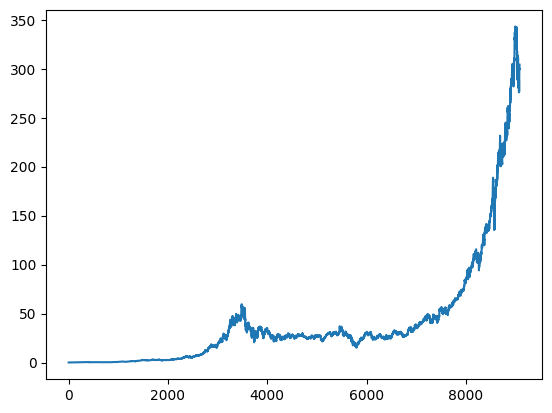

In [50]:
plt.plot(data)

**Splitting the dataset into the Training set and Testing set**

**Feature Scaling**

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(data).reshape(-1,1))
print(data)

[[2.02437349e-05]
 [3.03656023e-05]
 [3.54294513e-05]
 ...
 [8.86158182e-01]
 [8.72835309e-01]
 [8.86274817e-01]]


In [52]:
training_size = int(len(data)*0.75)

In [53]:
test_size = len(data)-training_size
print(test_size)

2271


In [54]:
train_data, test_data = data[0:training_size, :],data[training_size:len(data),:1]
train_data

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       ...,
       [8.14813914e-02],
       [8.16563055e-02],
       [8.18895283e-02]])

In [55]:
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [56]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)

In [57]:
X_test, Y_test = create_dataset(test_data, time_step)

In [58]:
X_train.shape

(6711, 100)

In [59]:
print("X_train shape after initial reshape:", X_train.shape)
print("X_test shape after initial reshape:", X_test.shape)


X_train shape after initial reshape: (6711, 100)
X_test shape after initial reshape: (2170, 100)


In [60]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [61]:
X_train.shape

(6711, 100, 1)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 60)           14880     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           22200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 57331 (223.95 KB)
Trainable params: 57331 (223.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.compile(loss="mean_squared_error", optimizer='adam')

In [21]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=100)

Epoch 1/100
98/98 [==============================] - 30s 244ms/step - loss: 1.8081e-04 - val_loss: 0.0022
Epoch 2/100
98/98 [==============================] - 21s 217ms/step - loss: 1.9631e-05 - val_loss: 0.0026
Epoch 3/100
98/98 [==============================] - 21s 218ms/step - loss: 1.6256e-05 - val_loss: 0.0040
Epoch 4/100
98/98 [==============================] - 22s 220ms/step - loss: 1.5461e-05 - val_loss: 0.0028
Epoch 5/100
98/98 [==============================] - 20s 207ms/step - loss: 1.3906e-05 - val_loss: 0.0029
Epoch 6/100
98/98 [==============================] - 22s 227ms/step - loss: 1.4706e-05 - val_loss: 0.0017
Epoch 7/100
98/98 [==============================] - 21s 211ms/step - loss: 1.2317e-05 - val_loss: 0.0024
Epoch 8/100
98/98 [==============================] - 23s 232ms/step - loss: 1.0338e-05 - val_loss: 0.0021
Epoch 9/100
98/98 [==============================] - 21s 216ms/step - loss: 9.7855e-06 - val_loss: 0.0025
Epoch 10/100
98/98 [==========================

In [23]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

82/82 [==============================] - 3s 39ms/step


In [24]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [25]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_train, train_predict))

21.678134783793894

In [26]:
np.sqrt(mean_squared_error(Y_test, test_predict))

121.23190588620136

In [27]:
test_data.shape

(2725, 1)

In [28]:
X_input = test_data[405:].reshape(1,-1)
X_input.shape

(1, 2320)

In [29]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [30]:
temp_input

[0.07713761180491009,
 0.07757491029516857,
 0.0768752362090963,
 0.0779538943516152,
 0.07812880850020668,
 0.07906169950754463,
 0.07856610699046514,
 0.07917831379874628,
 0.07917831379874628,
 0.07888678535895316,
 0.08022781909728587,
 0.0802861189546757,
 0.08101494005415848,
 0.0811024015013808,
 0.08139392994117392,
 0.08092748443750494,
 0.07976137359361689,
 0.08116070718933942,
 0.07973222074963758,
 0.07990713489822905,
 0.07944068939456007,
 0.0792657752459686,
 0.0800528962028412,
 0.08095664019676865,
 0.08101494005415848,
 0.08145223854441692,
 0.08148139138839625,
 0.08139392994117392,
 0.08151053840180676,
 0.08098579304074795,
 0.07987798205424973,
 0.08066510884169115,
 0.0795281508417824,
 0.0795281508417824,
 0.0808108701463033,
 0.08078171730232399,
 0.08121901579258245,
 0.08180206975688427,
 0.08238512663647049,
 0.0816271526930084,
 0.08177291399762056,
 0.0813647770971946,
 0.08098579304074795,
 0.0811024015013808,
 0.08113155434536012,
 0.08177291399762056,


In [68]:
# Prompt the user for input (date, month, year)
year = int(input("Enter the year: "))
month = int(input("Enter the month: "))
day = int(input("Enter the day: "))

input_date = datetime(year, month, day)

prediction_end_date = input_date + timedelta(days=30)

print(f"Start Date: {input_date.strftime('%Y-%m-%d')}")
print(f"End Date for Prediction: {prediction_end_date.strftime('%Y-%m-%d')}")


Enter the year: 2023
Enter the month: 10
Enter the day: 08
Start Date: 2023-10-08
End Date for Prediction: 2023-11-07


In [73]:
list_output = []
n_steps = 100
i = 0
temp_input = []

while input_date < prediction_end_date:
    if len(temp_input) > n_steps:
        X_input = np.array(temp_input[-n_steps:])
        X_input = X_input.reshape(1, -1)
        X_input = X_input.reshape((1, n_steps, 1))
        Y_pred = model.predict(X_input)
        print(f"{input_date.strftime('%Y-%m-%d')} Prediction: {Y_pred[0][0]}")
        temp_input.append(Y_pred[0][0])
        list_output.extend(Y_pred.tolist())
        input_date += timedelta(days=1)
    else:
        X_input = X_input.reshape((1, n_steps, 1))
        Y_pred = model.predict(X_input)
        temp_input.append(Y_pred[0][0])
        list_output.extend(Y_pred.tolist())
        input_date += timedelta(days=1)


1/1 [==============================] - 0s 34ms/step


In [74]:
print(list_output)

[[0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467], [0.000553544145077467]]


In [75]:
data.shape

(9083, 1)

In [76]:
data

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       ...,
       [8.86158182e-01],
       [8.72835309e-01],
       [8.86274817e-01]])

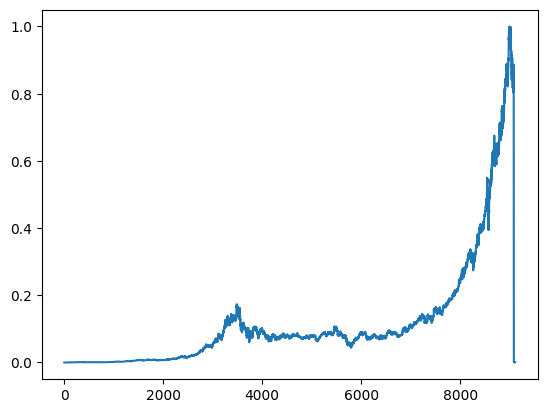

In [77]:
data_pred = data.tolist()
data_pred.extend(list_output)
plt.plot(data_pred)